In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

# Load the synthetic dataset
file_path = "Coles_synthetic_8weeks_v3_cleaned.csv"
df = pd.read_csv(file_path)

print(f"\n✅ Loaded dataset with {len(df)} rows and {df['product_code'].nunique()} unique products.")



✅ Loaded dataset with 164864 rows and 19782 unique products.



--- K-Means Clustering on Price Features ---


c:\Users\utkar\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\utkar\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\utkar\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\utkar\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038

price_cluster
0    96274
2    45270
3    21857
1     1463
Name: count, dtype: int64


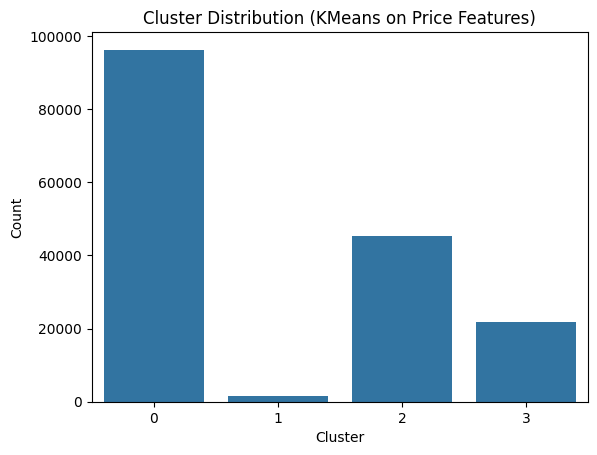

In [3]:
# ---------- K-MEANS CLUSTERING CHECK ----------
print("\n--- K-Means Clustering on Price Features ---")
price_features = df[['item_price', 'DiscountRate', 'DiscountedPrice']].copy()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(price_features)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['price_cluster'] = kmeans.fit_predict(scaled_features)

print(df['price_cluster'].value_counts())
sns.countplot(x='price_cluster', data=df)
plt.title('Cluster Distribution (KMeans on Price Features)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [4]:
# ---------- OUTLIER DETECTION ----------
print("\n--- Outlier Detection (Z-Score) ---")
z_scores = np.abs(stats.zscore(df[['item_price', 'DiscountedPrice']]))
outliers = (z_scores > 3).any(axis=1)
outlier_count = outliers.sum()
print(f"Detected {outlier_count} rows with extreme price outliers (Z-score > 3)")



--- Outlier Detection (Z-Score) ---
Detected 2988 rows with extreme price outliers (Z-score > 3)



--- Discount Rate Distribution per Week ---


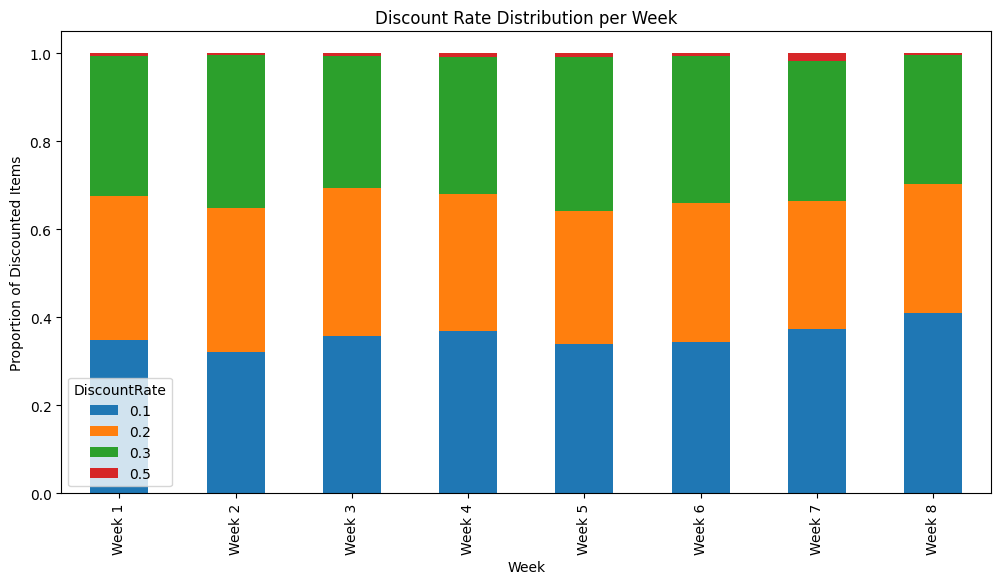

In [5]:
# ---------- DISTRIBUTION VISUALIZATION ----------
print("\n--- Discount Rate Distribution per Week ---")
discount_dist = df[df['IsOnSpecial'] == 1].groupby('Week')['DiscountRate'].value_counts(normalize=True).unstack().fillna(0)
discount_dist.plot(kind='bar', stacked=True, figsize=(12,6))
plt.ylabel('Proportion of Discounted Items')
plt.title('Discount Rate Distribution per Week')
plt.show()


In [6]:
#---------- CATEGORY-WISE PRICE SPREAD ----------
print("\n--- Category-Wise Price Spread ---")
price_spread = df.groupby(['Week', 'category'])['DiscountedPrice'].agg(['min', 'max', 'median', 'mean'])
print(price_spread.head(10))


--- Category-Wise Price Spread ---
                             min    max  median       mean
Week   category                                           
Week 1 Bakery                1.0   45.0    4.25   5.149485
       Dairy, Eggs & Fridge  1.0   28.0    5.00   5.349229
       Deli                  1.0   55.0    4.00   5.417355
       Drinks                1.0   63.0    5.00   6.831214
       Frozen                1.0   38.5    7.00   7.838929
       Fruit & Vegetables    1.0   38.0    3.50   3.910891
       Health & Beauty       1.0  100.0   11.00  13.341077
       Household             1.0  100.0    7.50  10.795406
       Meat & Seafood        1.0   31.0   10.00  10.922619
       Pantry                1.0   68.0    4.00   5.176395


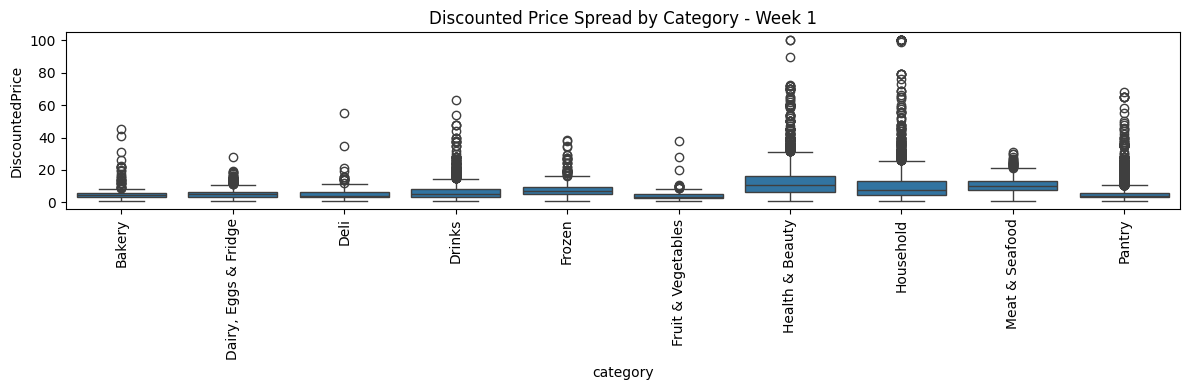

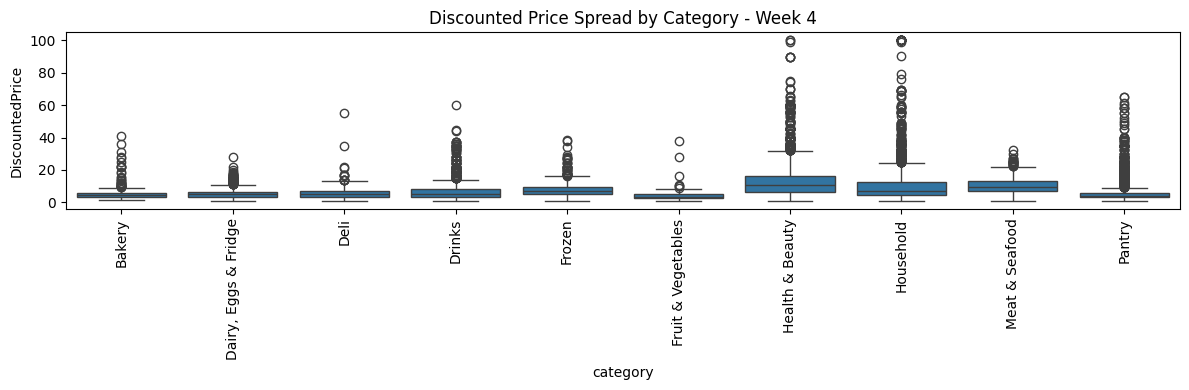

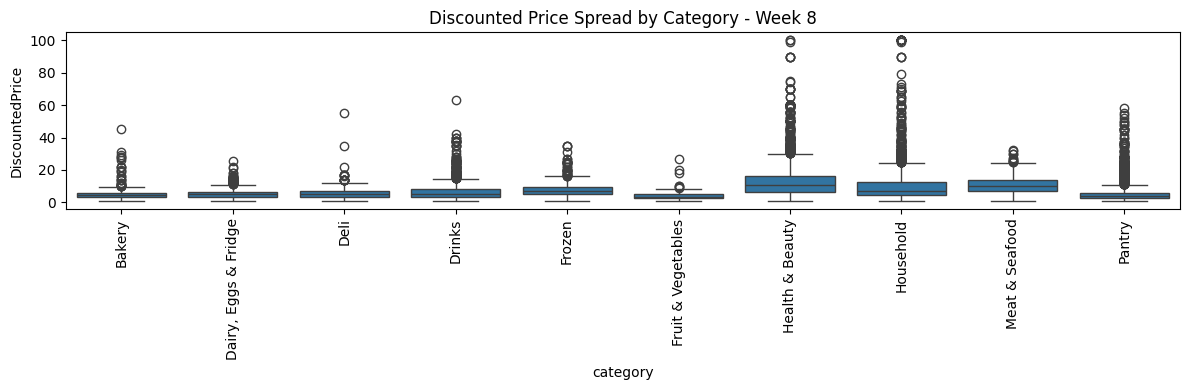


✅ Advanced checks complete.


In [8]:
# Optional: visualize for selected weeks or categories
selected_weeks = ['Week 1', 'Week 4', 'Week 8']
for week in selected_weeks:
    plt.figure(figsize=(12,4))
    sns.boxplot(data=df[df['Week'] == week], x='category', y='DiscountedPrice')
    plt.xticks(rotation=90)
    plt.title(f'Discounted Price Spread by Category - {week}')
    plt.tight_layout()
    plt.show()

print("\n✅ Advanced checks complete.")
